# Power Quality Classification using Muti Layer Perceptron (Dataset 1)

This notebook focusses on developing a Multi Layer perceptron which classifies a particular power signal into its respective power quality condition. The dataset used here contains signals which belong to one of the 5 classes(power quality condition). The sampling rate of this data is 128. This means that each signal is characterized by 128 data points. Here the signals provided are in time domain.

The power quality condition with respect to the output class value is as follows: <br>
1 - Normal<br>
2 - 3rd harmonic wave<br>
3 - 5th harmonic wave<br>
4 - Voltage dip<br>
5 - transient<br>

In [1]:
#importing the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.fft import fft,fftfreq
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

In [2]:
#loading the dataset using pandas
data1 = pd.read_csv("../Dataset/Train/Voltage_L1_DataSet1.csv")
out1 = pd.read_csv("../Dataset/Train/OutputFor_DataSet1.csv")
data2 = pd.read_csv("../Dataset/Test/Voltage_L1_DataSet2.csv")
out2 = pd.read_csv("../Dataset/Test/OutputFor_DataSet2.csv")

In [3]:
print("data1",data1.shape)
print("out1",out1.shape)
print("data2",data2.shape)
print("out2",out2.shape)

data1 (11899, 128)
out1 (5999, 1)
data2 (5999, 128)
out2 (5999, 1)


## Data Preprocessing

This segment of notebook contains all the preprocessing steps which are performed on the data.

### Data cleaning

In [4]:
#dropna() function is used to remove all those rows which contains NA values
data1.dropna(axis=0,inplace=True)

In [5]:
#shape of the data frame after dropping the rows containing NA values
data1.shape

(5999, 128)

In [6]:
#here we are constructing the array which will finally contain the column names
header =[]
for i in range(1,data1.shape[1]+1):
    header.append("Col"+str(i))

In [7]:
#assigning the column name array to the respectinve dataframes
data1.columns = header
data2.columns = header

In [8]:
data1.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col119,Col120,Col121,Col122,Col123,Col124,Col125,Col126,Col127,Col128
0,-797.962914,-1320.199586,-1828.741445,-2319.935857,-2789.218649,-3231.111864,-3641.962908,-4018.119193,-4355.929647,-4650.829055,...,4008.077109,3632.834002,3221.982426,2780.090228,2311.720161,1821.438861,1311.983509,790.659456,262.031836,-269.335205
1,4387.885674,4567.747164,4693.741356,4776.824895,4824.300958,4850.777519,4862.646175,4867.211521,4866.298624,4858.081691,...,-850.916937,-165.252287,524.062959,1199.684611,1842.437384,2437.714882,2972.733259,3437.450839,3828.215741,4143.201102
2,-4050.074299,-4340.408587,-4576.875995,-4769.518913,-4918.338175,-5025.159834,-5100.026323,-5141.111052,-5153.892968,-5137.458861,...,1161.338395,563.322919,-47.475988,-656.447463,-1252.637741,-1825.089177,-2364.673580,-2861.346591,-3309.630078,-3706.785897
3,3458.450134,3686.700705,4000.773209,4392.451258,4834.343975,5269.845213,5636.871457,5876.078192,5950.944421,5841.384319,...,-1450.758930,-722.183210,67.562203,850.005032,1561.232918,2152.858410,2601.141643,2912.474970,3123.378574,3286.805684
4,-910.262100,-312.245917,298.552078,896.568469,1462.629392,1978.474763,2439.540162,2847.652177,3212.852886,3547.924521,...,-4805.126485,-4506.574476,-4196.154858,-3881.168803,-3560.705563,-3225.633496,-2860.433401,-2452.321914,-1991.255895,-1474.497200


In [9]:
data2.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col119,Col120,Col121,Col122,Col123,Col124,Col125,Col126,Col127,Col128
0,-4918.927835,-4668.999112,-4375.127119,-4034.564431,-3659.213495,-3247.243211,-2804.145676,-2333.584172,-1841.965323,-1332.037736,...,-4663.506099,-4918.012016,-5121.251501,-5275.969344,-5381.249941,-5433.432863,-5434.348878,-5382.165656,-5278.715575,-5123.997634
1,2920.413836,2376.612648,1773.304349,1123.306756,444.013104,-248.097664,-933.799415,-1594.783666,-2213.654301,-2776.681104,...,4871.323226,4852.098262,4814.562485,4748.647181,4645.197563,4492.310731,4274.423564,3991.537412,3633.580485,3201.469277
2,-2808.723170,-2303.372710,-1758.656432,-1180.066319,-579.504820,32.957795,643.590017,1241.404644,1815.417600,2356.471851,...,-5151.462319,-5106.602976,-5027.871511,-4914.350757,-4759.632168,-4565.548254,-4319.281944,-4020.831887,-3671.114971,-3265.552744
3,2871.892861,2532.245964,2055.275298,1435.488878,704.927781,-86.971408,-871.546088,-1584.713275,-2177.034698,-2625.625239,...,5858.221546,5590.898767,5202.730284,4759.633062,4322.945050,3943.932165,3647.312850,3432.172965,3265.553468,3098.018896
4,5534.138053,5395.898976,5186.251418,4924.421624,4631.464792,4323.859863,4009.847091,3692.171624,3363.511349,3012.878248,...,3558.510431,3879.847783,4193.860201,4506.042306,4808.154800,5085.548312,5318.082271,5487.448225,5576.250464,5574.419599


In [10]:
#now we are combining the two dataframes to make a final dataframe
data = data1.append(data2, ignore_index = True)
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col119,Col120,Col121,Col122,Col123,Col124,Col125,Col126,Col127,Col128
0,-797.962914,-1320.199586,-1828.741445,-2319.935857,-2789.218649,-3231.111864,-3641.962908,-4018.119193,-4355.929647,-4650.829055,...,4008.077109,3632.834002,3221.982426,2780.090228,2311.720161,1821.438861,1311.983509,790.659456,262.031836,-269.335205
1,4387.885674,4567.747164,4693.741356,4776.824895,4824.300958,4850.777519,4862.646175,4867.211521,4866.298624,4858.081691,...,-850.916937,-165.252287,524.062959,1199.684611,1842.437384,2437.714882,2972.733259,3437.450839,3828.215741,4143.201102
2,-4050.074299,-4340.408587,-4576.875995,-4769.518913,-4918.338175,-5025.159834,-5100.026323,-5141.111052,-5153.892968,-5137.458861,...,1161.338395,563.322919,-47.475988,-656.447463,-1252.637741,-1825.089177,-2364.673580,-2861.346591,-3309.630078,-3706.785897
3,3458.450134,3686.700705,4000.773209,4392.451258,4834.343975,5269.845213,5636.871457,5876.078192,5950.944421,5841.384319,...,-1450.758930,-722.183210,67.562203,850.005032,1561.232918,2152.858410,2601.141643,2912.474970,3123.378574,3286.805684
4,-910.262100,-312.245917,298.552078,896.568469,1462.629392,1978.474763,2439.540162,2847.652177,3212.852886,3547.924521,...,-4805.126485,-4506.574476,-4196.154858,-3881.168803,-3560.705563,-3225.633496,-2860.433401,-2452.321914,-1991.255895,-1474.497200


In [11]:
data.shape

(11998, 128)

In [12]:
#here we are giving a name to the output column
header_out = ["output"]
out1.columns = header_out
out2.columns = header_out

In [13]:
out2.head()

,output
0,1
1,2
2,2
3,3
4,3


In [14]:
#now we are combining the output columns
output = out1.append(out2, ignore_index = True)
output.head()

,output
0,1
1,2
2,2
3,3
4,3


In [15]:
output.shape

(11998, 1)

In [16]:
#now we are appending the output column to the original dataframe which contains the power signals
data['output'] = output

In [17]:
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col120,Col121,Col122,Col123,Col124,Col125,Col126,Col127,Col128,output
0,-797.962914,-1320.199586,-1828.741445,-2319.935857,-2789.218649,-3231.111864,-3641.962908,-4018.119193,-4355.929647,-4650.829055,...,3632.834002,3221.982426,2780.090228,2311.720161,1821.438861,1311.983509,790.659456,262.031836,-269.335205,1
1,4387.885674,4567.747164,4693.741356,4776.824895,4824.300958,4850.777519,4862.646175,4867.211521,4866.298624,4858.081691,...,-165.252287,524.062959,1199.684611,1842.437384,2437.714882,2972.733259,3437.450839,3828.215741,4143.201102,2
2,-4050.074299,-4340.408587,-4576.875995,-4769.518913,-4918.338175,-5025.159834,-5100.026323,-5141.111052,-5153.892968,-5137.458861,...,563.322919,-47.475988,-656.447463,-1252.637741,-1825.089177,-2364.673580,-2861.346591,-3309.630078,-3706.785897,2
3,3458.450134,3686.700705,4000.773209,4392.451258,4834.343975,5269.845213,5636.871457,5876.078192,5950.944421,5841.384319,...,-722.183210,67.562203,850.005032,1561.232918,2152.858410,2601.141643,2912.474970,3123.378574,3286.805684,3
4,-910.262100,-312.245917,298.552078,896.568469,1462.629392,1978.474763,2439.540162,2847.652177,3212.852886,3547.924521,...,-4506.574476,-4196.154858,-3881.168803,-3560.705563,-3225.633496,-2860.433401,-2452.321914,-1991.255895,-1474.497200,3


In [18]:
data_arr = data.to_numpy()

### Data transformation

The data transformation steps employed here are as follows:<br>

1) Fourier Transform<br>
2) Normalization


<ipython-input-19-f9431be86f11>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  w1[0:128] = fft(w1[0:128])


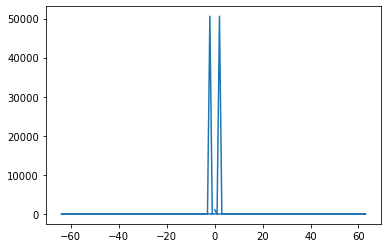

<ipython-input-19-f9431be86f11>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  w2[0:128] = fft(w2[0:128])


class 1.0 Normal wave


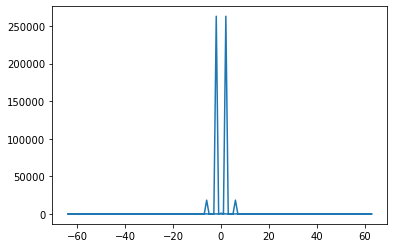

class 2.0 3rd harmonic wave


<ipython-input-19-f9431be86f11>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  w3[0:128] = fft(w3[0:128])


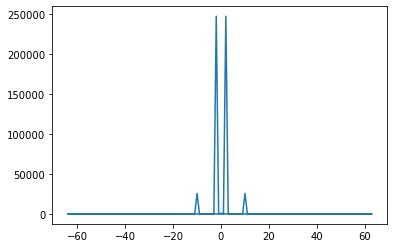

class 3.0 5th harmonic wave


<ipython-input-19-f9431be86f11>:24: ComplexWarning: Casting complex values to real discards the imaginary part
  w4[0:128] = fft(w4[0:128])


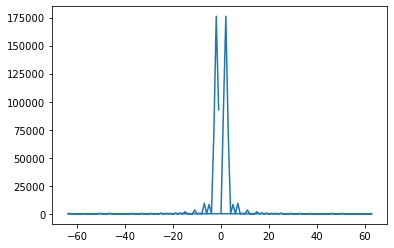

class 4.0 Voltage dip


<ipython-input-19-f9431be86f11>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  w5[0:128] = fft(w5[0:128])


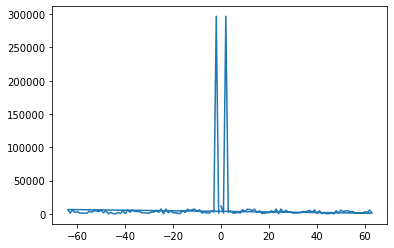

class 5.0 Transient wave


In [19]:
#In this segment we are plotting one wave from each class after applying fourier transformation 
w1 = data_arr[0][0:128]
w1[0:128] = fft(w1[0:128])
xf = fftfreq(128,1/128)
plt.plot(xf, np.abs(w1))
plt.show()
print("class",data_arr[0][128], "Normal wave")

w2 = data_arr[1][0:128]
w2[0:128] = fft(w2[0:128])
xf = fftfreq(128,1/128)
plt.plot(xf, np.abs(w2))
plt.show()
print("class",data_arr[1][128], "3rd harmonic wave")

w3 = data_arr[3][0:128]
w3[0:128] = fft(w3[0:128])
xf = fftfreq(128,1/128)
plt.plot(xf, np.abs(w3))
plt.show()
print("class",data_arr[3][128], "5th harmonic wave")

w4 = data_arr[6][0:128]
w4[0:128] = fft(w4[0:128])
xf = fftfreq(128,1/128)
plt.plot(xf, np.abs(w4))
plt.show()
print("class",data_arr[6][128], "Voltage dip")

w5 = data_arr[8][0:128]
w5[0:128] = fft(w5[0:128])
xf = fftfreq(128,1/128)
plt.plot(xf, np.abs(w5))
plt.show()
print("class",data_arr[8][128], "Transient wave")

In [20]:
#here we are overwritting the dataframe with the waves which we obtained after doing fourier transformation
n = data_arr.shape[0]
for i in range(0,n):
    data_arr[i][0:64] = fft(data_arr[i][0:64])

<ipython-input-20-6fbb1b1522a7>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  data_arr[i][0:64] = fft(data_arr[i][0:64])


In [21]:
#here we are performing normalization
transform = StandardScaler()
data_arr = transform.fit_transform(data_arr)

In [22]:
#converting the numpy array back to data frame
data = pd.DataFrame(data_arr,columns=header+header_out)

## Model creation and training

In [23]:
#here we are splitting the dataset in the ratio of 60%,20%,20% (training set,validation set, test set)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.loc[:,data.columns != 'output'],data['output'],test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)


In [24]:
# get_dummies function is used here to perform one hot encoding of the y_* numpy arrays
y_train_hot = pd.get_dummies(y_train)
y_test_hot = pd.get_dummies(y_test)
y_val_hot = pd.get_dummies(y_val)

In [25]:
print("Training",x_train.shape)
print(y_train_hot.shape)
print("Validation",x_val.shape)
print(y_val_hot.shape)
print("Test",x_test.shape)
print(y_test_hot.shape)

Training (7198, 128)
(7198, 5)
Validation (2400, 128)
(2400, 5)
Test (2400, 128)
(2400, 5)


In [26]:
model = Sequential()
model.add(Dense(64, input_shape=(128,), activation = 'relu'))

model.add(Dense(32, activation = 'relu'))
#model.add(Dropout(0.6))
model.add(Dense(16, activation = 'relu'))
#model.add(Dropout(0.6))

#model.add(Dense(16, activation = 'relu'))
#model.add(Dense(32, activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(5, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 85        
Total params: 10,949
Trainable params: 10,949
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(x_train, y_train_hot, batch_size=64, epochs=30, validation_data=(x_val, y_val_hot))

Epoch 1/30
113/113 [==============================] - 1s 4ms/step - loss: 1.3666 - accuracy: 0.3967 - val_loss: 0.8370 - val_accuracy: 0.6717
Epoch 2/30
113/113 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.7353 - val_loss: 0.5259 - val_accuracy: 0.8179
Epoch 3/30
113/113 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.8315 - val_loss: 0.4232 - val_accuracy: 0.8583
Epoch 4/30
113/113 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.9050 - val_loss: 0.5414 - val_accuracy: 0.9404
Epoch 5/30
113/113 [==============================] - 0s 2ms/step - loss: 0.3030 - accuracy: 0.9290 - val_loss: 0.3040 - val_accuracy: 0.9583
Epoch 6/30
113/113 [==============================] - 0s 2ms/step - loss: 0.1766 - accuracy: 0.9570 - val_loss: 0.4833 - val_accuracy: 0.9500
Epoch 7/30
113/113 [==============================] - 0s 2ms/step - loss: 0.1601 - accuracy: 0.9529 - val_loss: 0.3875 - val_accuracy: 0.9704
Epoch 

In [29]:
print(model.metrics_names)

['loss', 'accuracy']


## Model evaluation

In [30]:
pred_acc = model.evaluate(x_test,y_test_hot)
print("Test accuracy is {}".format(pred_acc))

75/75 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.9879
Test accuracy is [0.03924763947725296, 0.9879166483879089]


In [31]:
x_test_arr = x_test.to_numpy()
predict = model.predict(x_test_arr[0:10][:])
predict_class = np.argmax(predict, axis=1)
predict_class = np.array(predict_class.tolist())
print(predict_class+1)

[5 2 4 5 5 1 1 5 5 5]


In [32]:
model.save('model.h5')